CAPSTONE PROJECT-4 :- PRCP-1017-AutoPricePred
PROJECT TEAM ID :- PTID-CDS-NOV-23-1680

Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.
Task 2:-Create a predictive model by applying some data science techniques for the
price of cars with the available independent variables. That should help the
management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to
meet certain price levels

Imported libaries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("auto_imports.csv")
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
data.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [4]:
data.shape

(200, 26)

Add columns name

In [5]:
data.columns = ['symboling',' normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
data.columns
data.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [13]:
data.columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
data.columns
data.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


Domain Analysis

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

Basic checks

In [6]:
data.shape

(200, 26)

In [7]:
data.columns

Index(['symboling', ' normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           200 non-null    int64  
 1    normalized_losses  200 non-null    object 
 2   make                200 non-null    object 
 3   fuel_type           200 non-null    object 
 4   aspiration          200 non-null    object 
 5   num_of_doors        200 non-null    object 
 6   body_style          200 non-null    object 
 7   drive_wheels        200 non-null    object 
 8   engine_location     200 non-null    object 
 9   wheel_base          200 non-null    float64
 10  length              200 non-null    float64
 11  width               200 non-null    float64
 12  height              200 non-null    float64
 13  curb_weight         200 non-null    int64  
 14  engine_type         200 non-null    object 
 15  num_of_cylinders    200 non-null    object 
 16  engine_s

In [9]:
data.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,200.0,0.8300,1.248557,-2.0,0.000,1.0,2.000,3.0
wheel_base,200.0,98.8480,6.038261,86.6,94.500,97.0,102.400,120.9
length,200.0,174.2280,12.347132,141.1,166.675,173.2,183.500,208.1
width,200.0,65.8980,2.102904,60.3,64.175,65.5,66.675,72.0
height,200.0,53.7915,2.428449,47.8,52.000,54.1,55.525,59.8
curb_weight,200.0,2555.7050,518.594552,1488.0,2163.000,2414.0,2928.250,4066.0
engine_size,200.0,126.8600,41.650501,61.0,97.750,119.5,142.000,326.0
compression_ratio,200.0,10.1701,4.014163,7.0,8.575,9.0,9.400,23.0
city_mpg,200.0,25.2000,6.432487,13.0,19.000,24.0,30.000,49.0
highway_mpg,200.0,30.7050,6.827227,16.0,25.000,30.0,34.000,54.0


In [11]:
data.isnull().sum()

symboling             0
 normalized_losses    0
make                  0
fuel_type             0
aspiration            0
num_of_doors          0
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [12]:
data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Feature engineering

In [14]:
# % of missing values
(data.isna().sum() / data.shape[0]) * 100

symboling            0.0
normalized_losses    0.0
make                 0.0
fuel_type            0.0
aspiration           0.0
num_of_doors         0.0
body_style           0.0
drive_wheels         0.0
engine_location      0.0
wheel_base           0.0
length               0.0
width                0.0
height               0.0
curb_weight          0.0
engine_type          0.0
num_of_cylinders     0.0
engine_size          0.0
fuel_system          0.0
bore                 0.0
stroke               0.0
compression_ratio    0.0
horsepower           0.0
peak_rpm             0.0
city_mpg             0.0
highway_mpg          0.0
price                0.0
dtype: float64

Missing values:

There are no missing values observed.

In [15]:
# converting from numeric to categorical variable type
data["symboling"] = data["symboling"].astype(str)

Creating price category

In [18]:
# categorizing price into standard and high-end
data["price_category"] = data["price"].apply(lambda x: "standard" if x <= 18500 else "high-end")

In [19]:
# creating list of numeric and categorical columns
col_numeric = list(data.select_dtypes(exclude="object"))

col_categorical = list(data.select_dtypes(include="object"))

Exploratory Data Analysis

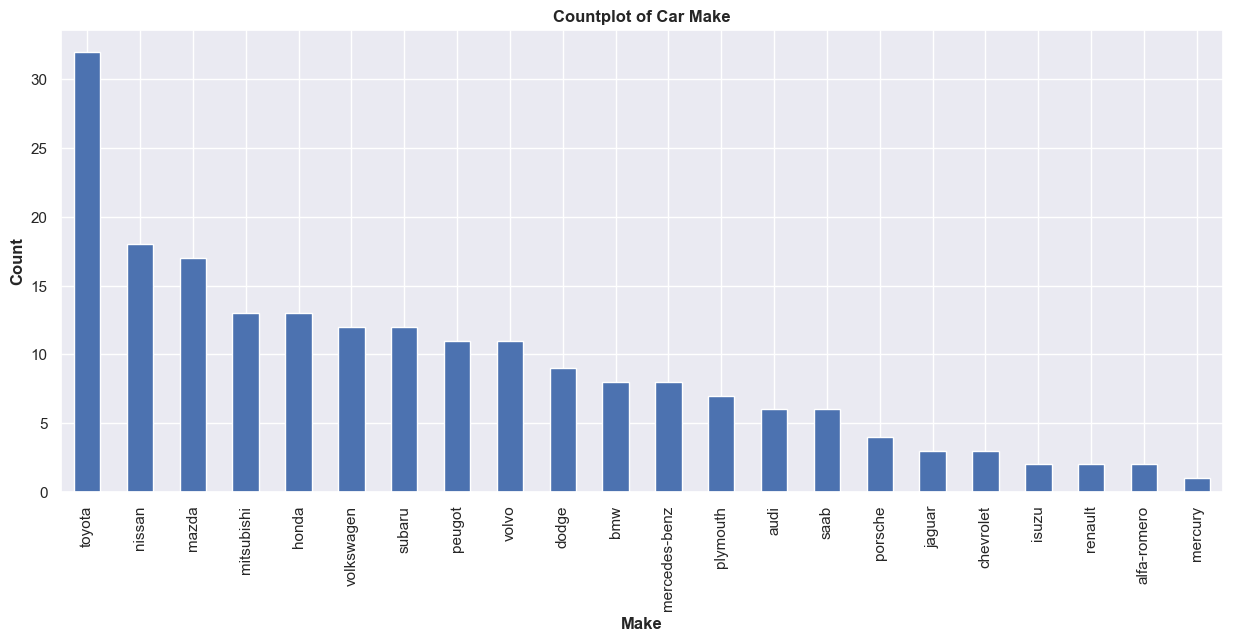

In [20]:
# visualizing the car make
sns.set(rc={'figure.figsize':(15,6)})
df["make"].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.xlabel("Make", fontweight="bold")
plt.ylabel("Count", fontweight="bold")
plt.title("Countplot of Car Make", fontweight="bold")
plt.show()

Insights:

Toyota seems to be the most favourite make.
Mercury seems to be the least favourite make.

ValueError: could not convert string to float: '?'

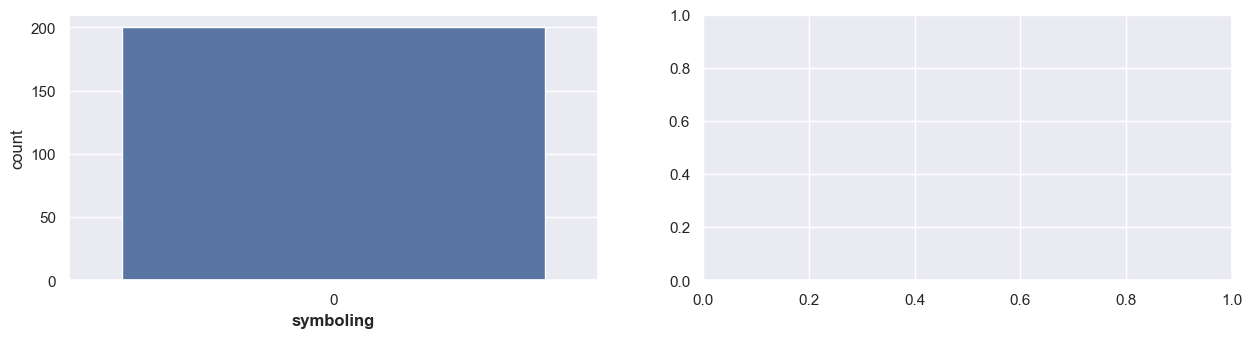

In [28]:
# # visualizing the other categorical variables
# plt.figure(figsize=(15,20))
# for i,col in enumerate(col_categorical[:-2], start=1):
#     plt.subplot(5,2,i)
#     sns.countplot(df[col])
#     plt.xlabel(col, fontweight="bold")
# plt.show()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


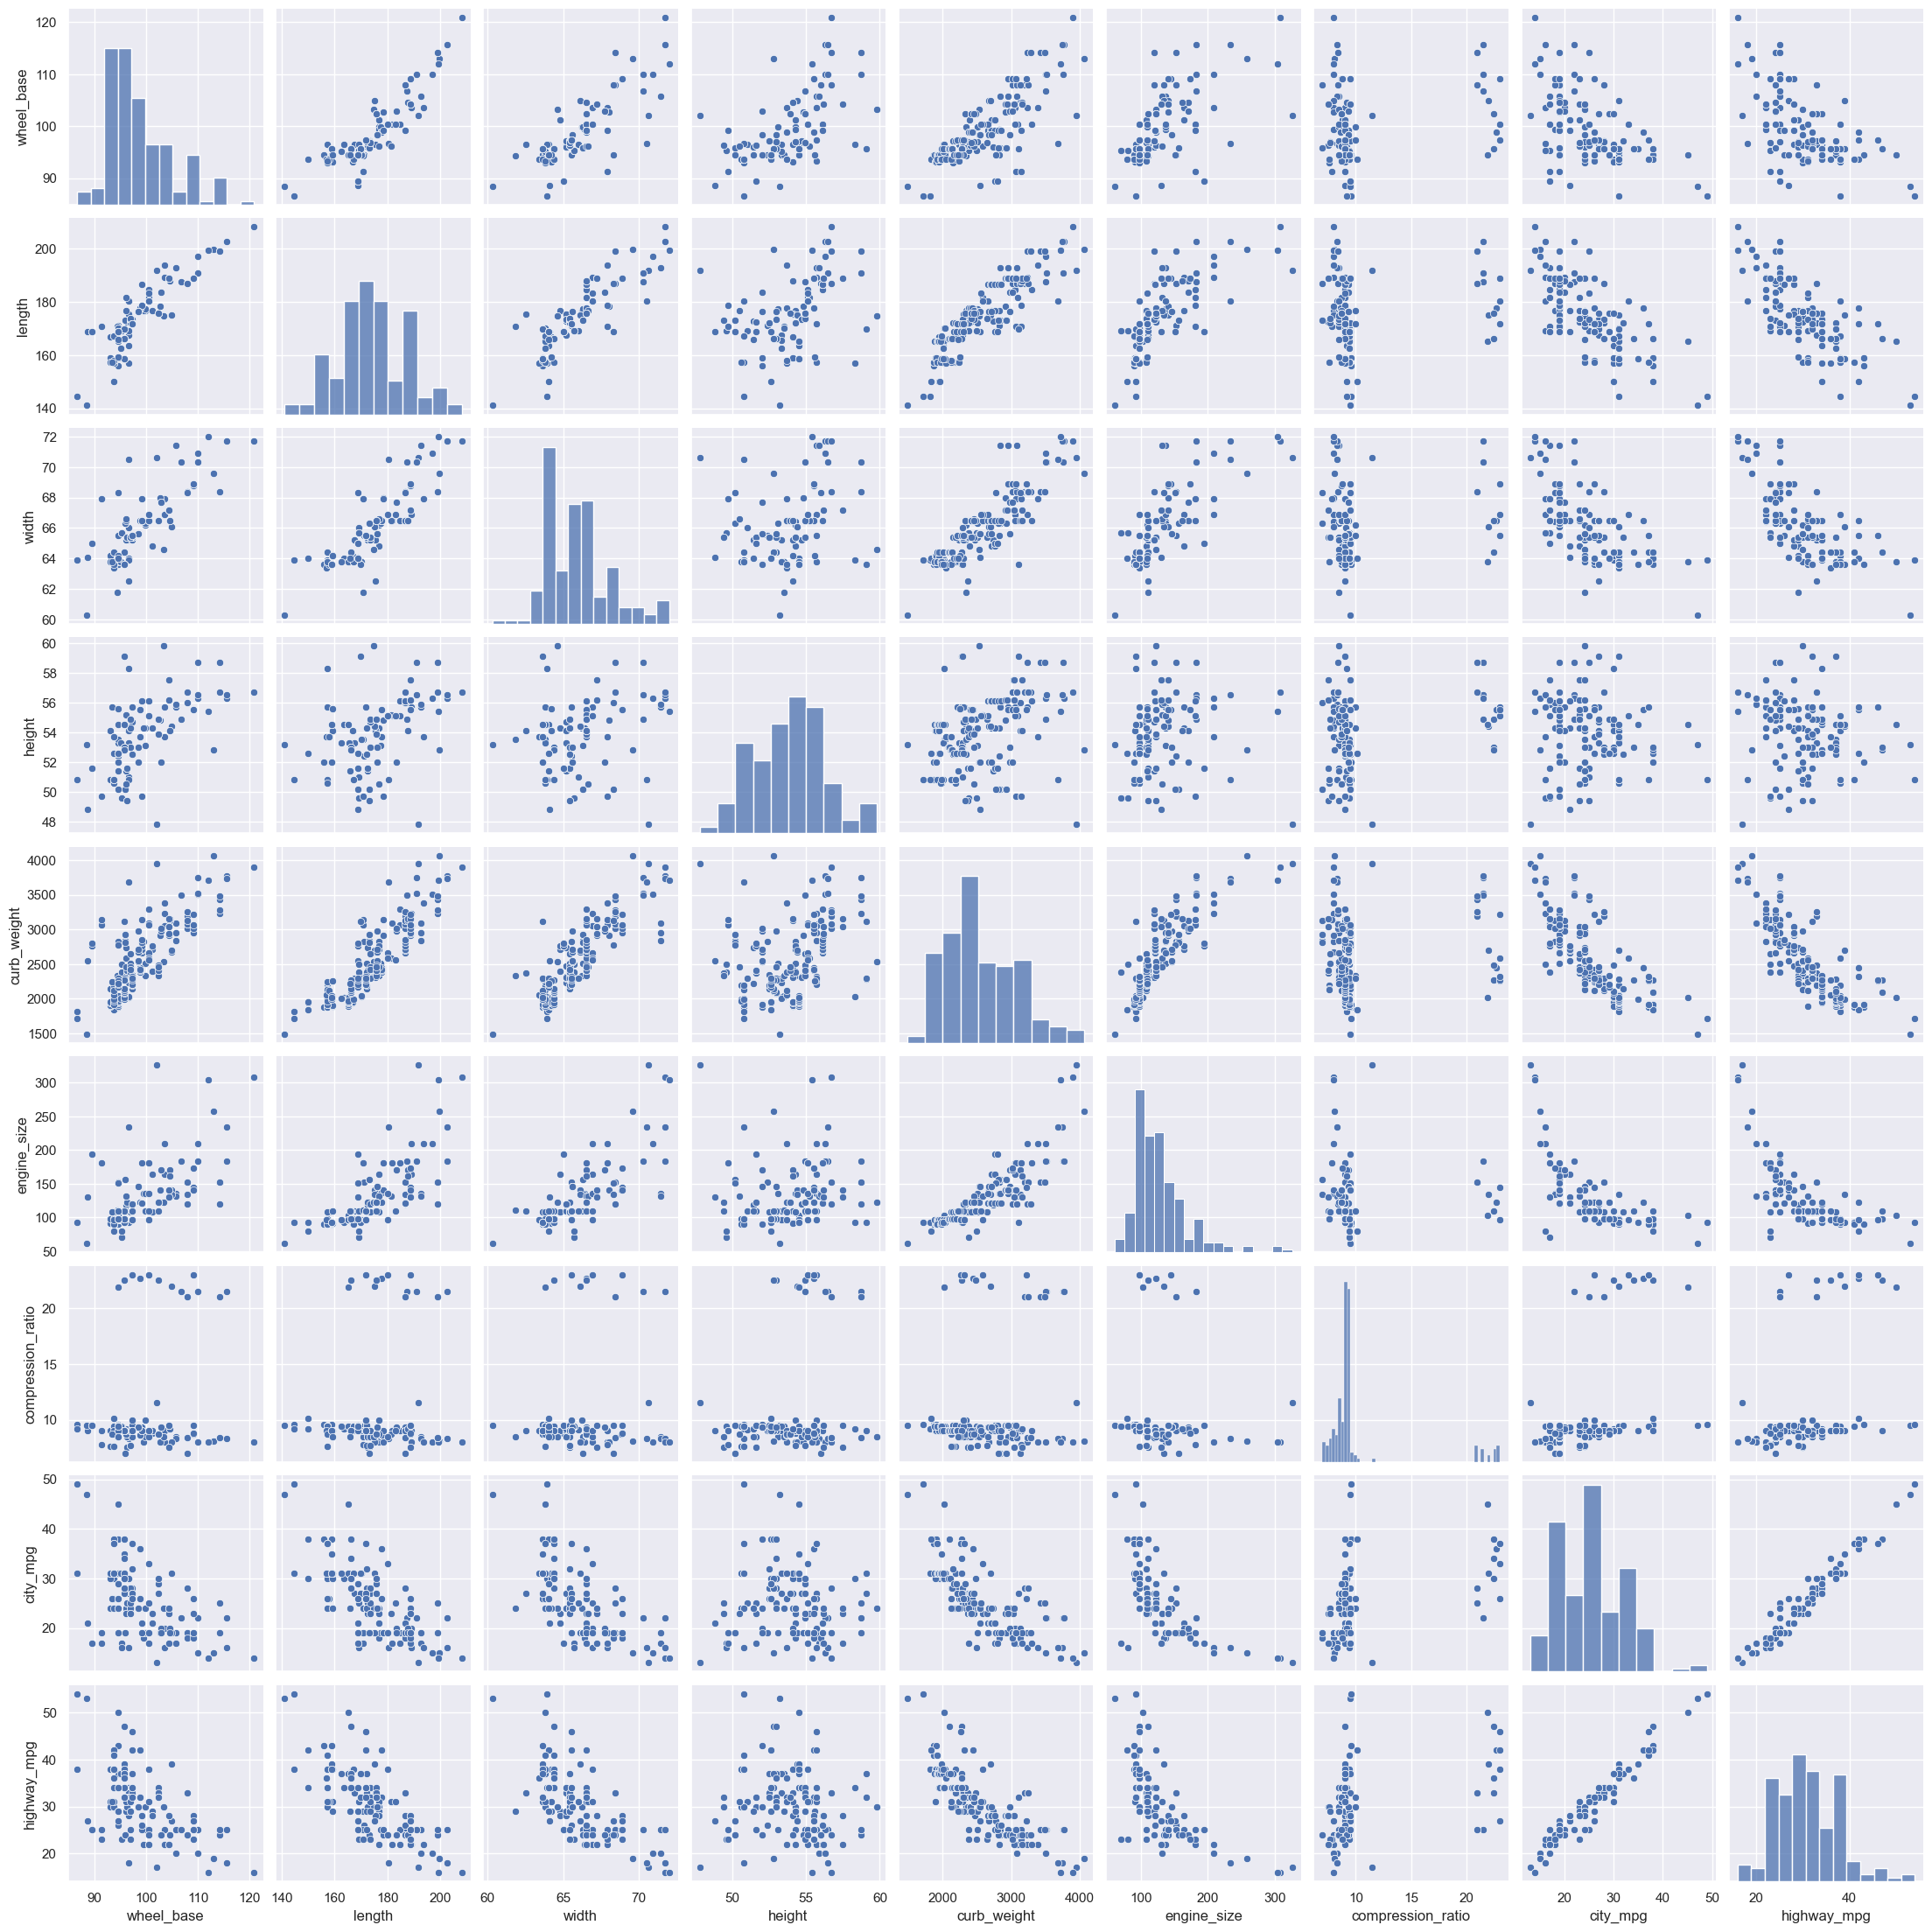

In [30]:
# pair plot to understand the correlation between the numeric variables (except price)
sns.pairplot(data[col_numeric[:-1]])
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12968\1402865262.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price"])


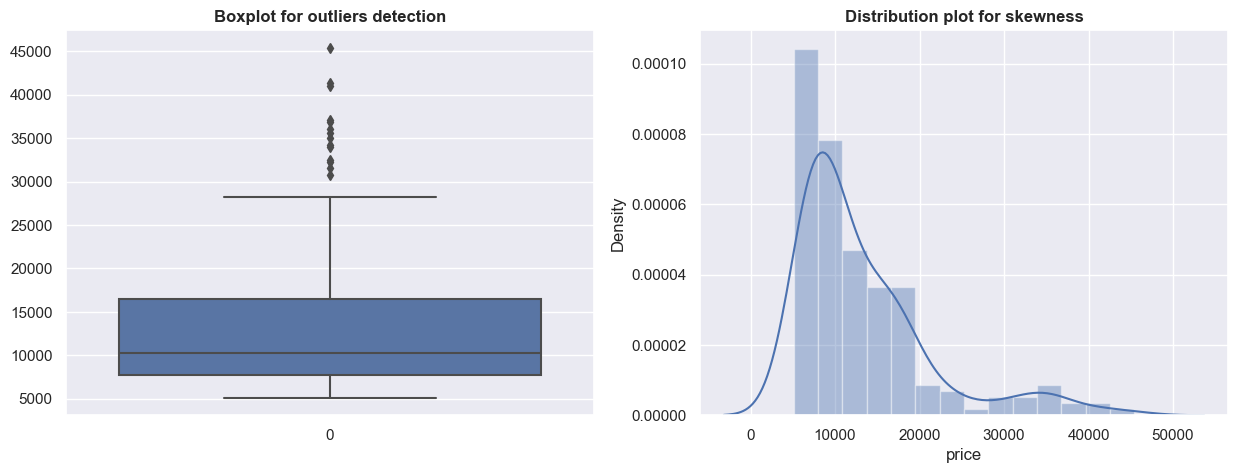

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data["price"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1,2,2)
sns.distplot(data["price"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

Insights:

There are few outliers towards the higher price range, suggesting that there are few high price models.
The distribution of price is right skewed, maybe we should think about applying transformation methods.
Most of the models are within 5000 and 18000 price range.

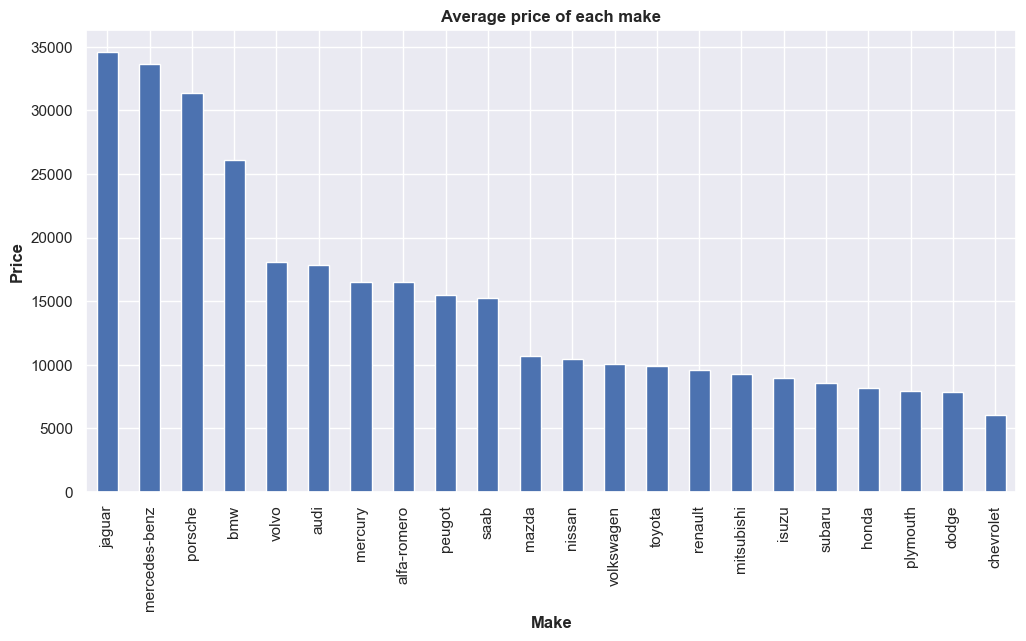

In [37]:
# average price of each make
data.groupby("make")["price"].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title("Average price of each make", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.xlabel("Make", fontweight="bold")
plt.show()

Insights:

jaguar make is having highest average price.
chevrolet make is having least average price.

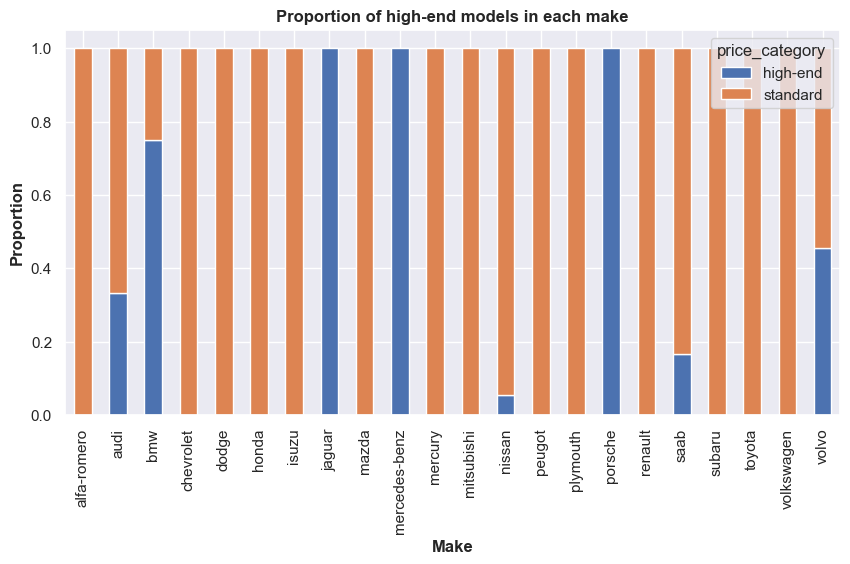

In [38]:
# proportion of high-end models in each make
pd.crosstab(data["make"], data["price_category"], normalize="index").plot.bar(stacked=True, figsize=(10,5))
plt.xlabel("Make", fontweight="bold")
plt.ylabel("Proportion", fontweight="bold")
plt.title("Proportion of high-end models in each make", fontweight="bold")
plt.show()

Insights:

buick, jaguar and porsche are having only high-end models.
bmw is having 80% of their models as high-end.
volvo is having equal proportion of high-end and standard price models.
audi, nissan and saab are having less than 33% of models as high-end.
The rest (majority) of the car makers are having only standard price models.

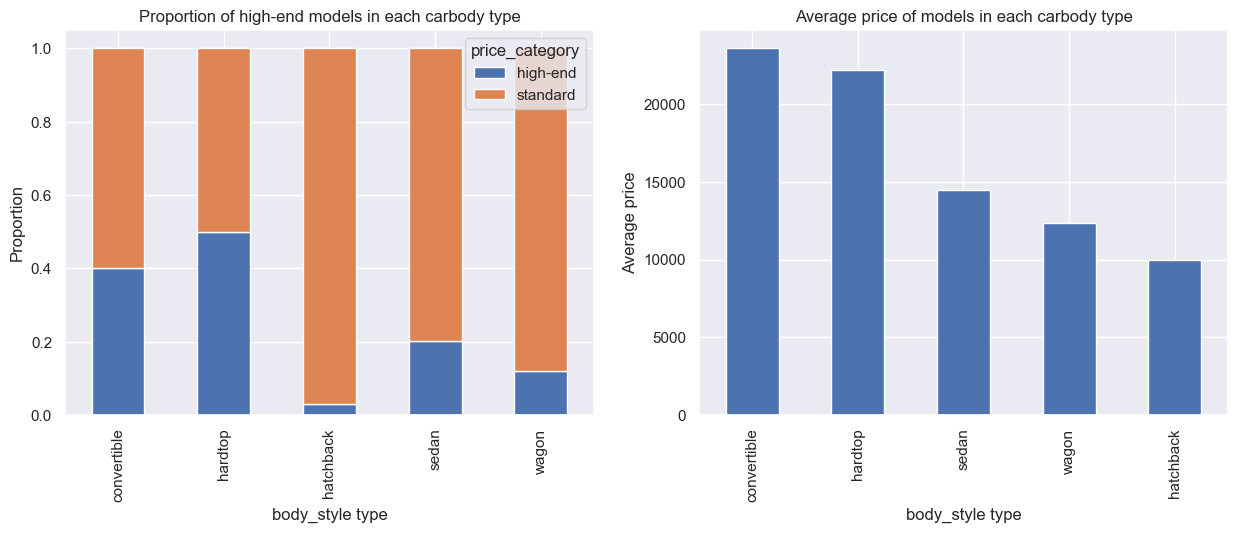

In [40]:
# price analysis for each carbody type
fig, ax = plt.subplots(1,2, figsize=(15,5))

pd.crosstab(data["body_style"], data["price_category"], normalize="index").plot.bar(stacked=True, ax=ax[0])
ax[0].set(xlabel="body_style type", ylabel="Proportion", title="Proportion of high-end models in each carbody type")

data.groupby("body_style")["price"].mean().sort_values(ascending=False).plot.bar(ax=ax[1])
ax[1].set(xlabel="body_style type", ylabel="Average price", title="Average price of models in each carbody type")

plt.show()

Insights:

hardtop and convertible are having highest average price, and also high proportion of high-end price models.

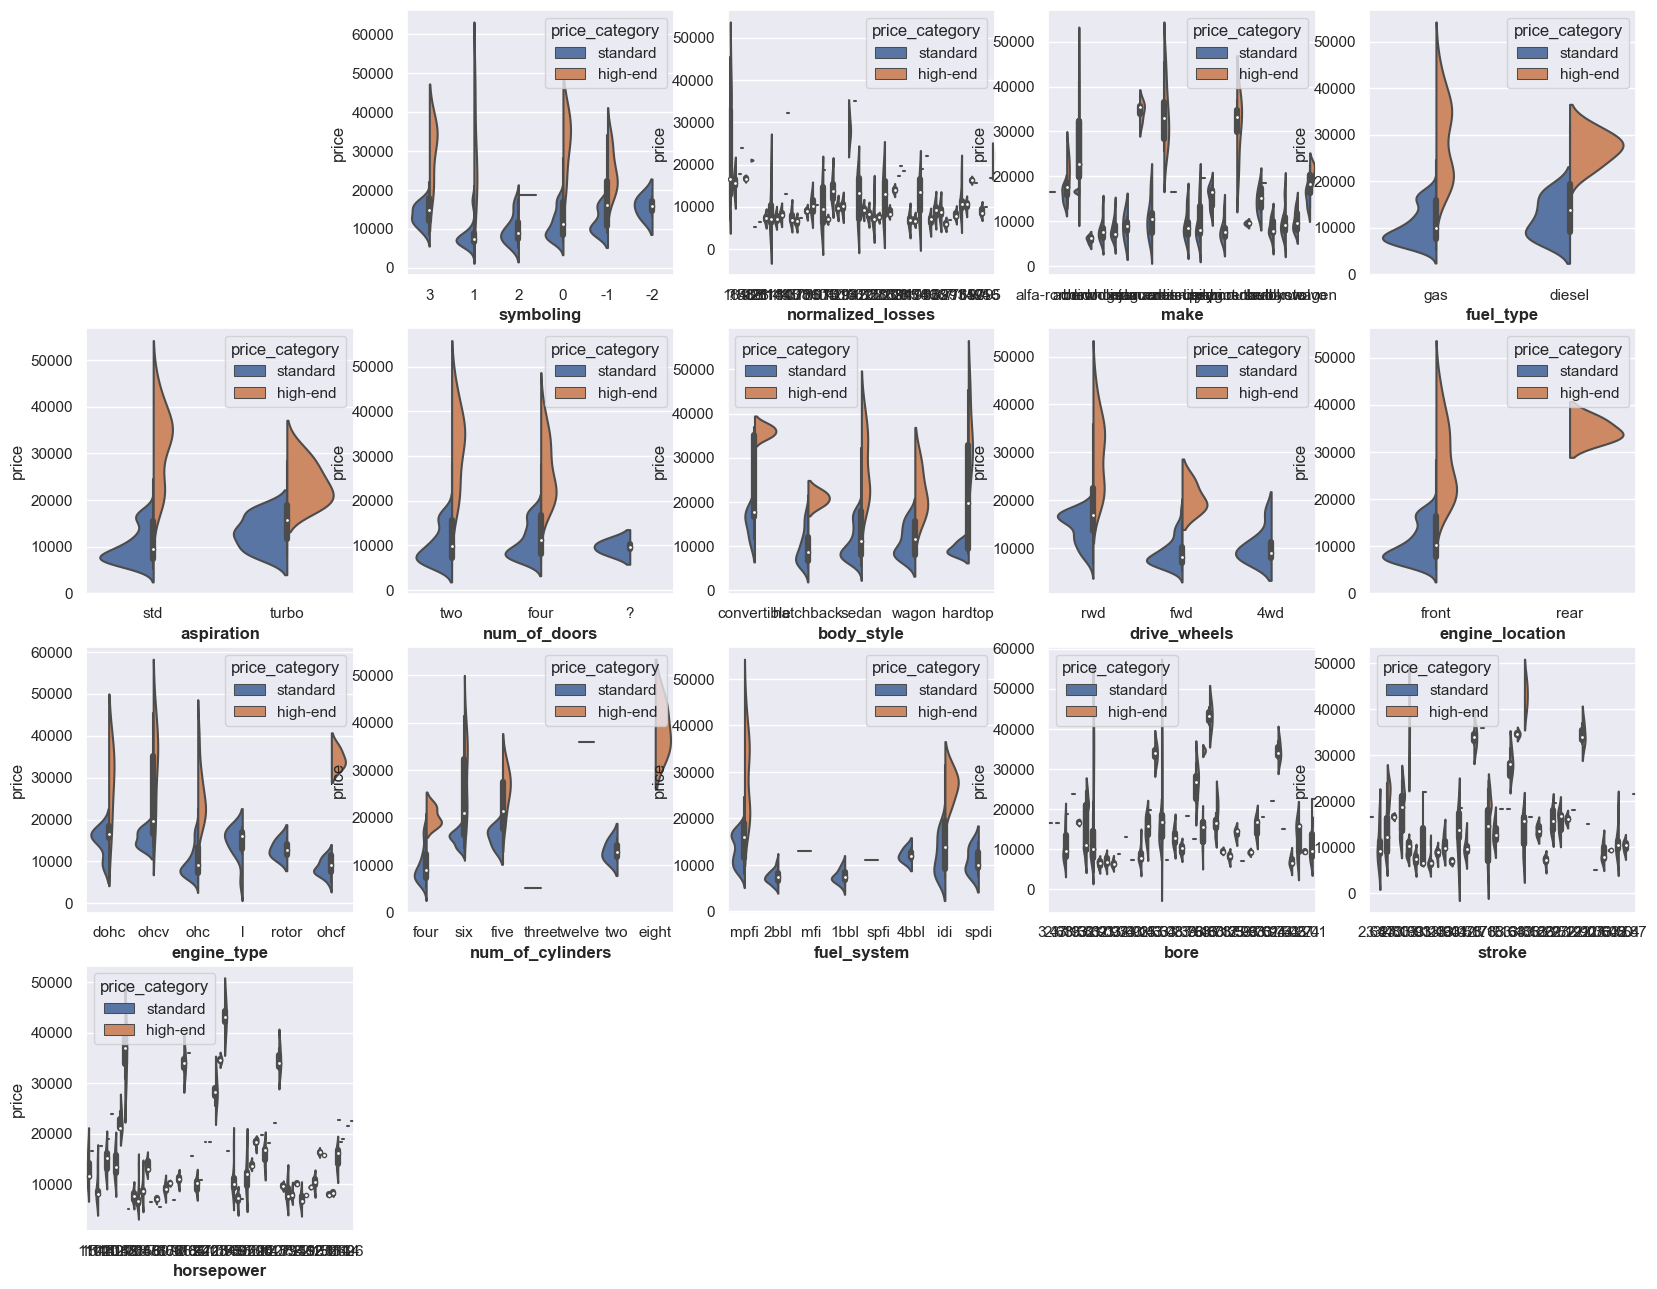

In [45]:
# visualizing distribution of price with the other categorical variables
plt.figure(figsize=(20,20))
for i,col in enumerate(col_categorical[:-2], start=1):
    plt.subplot(5,5,i+1)
    sns.violinplot(data=data, x=col, y="price", split=True, hue="price_category")
    plt.xlabel(col, fontweight="bold")
plt.show()

Insights:

price and symboling, fueltype, doornumber, carbody doesn't seem to have much correlation.
Safest (symboling -2) seems to have only standard priced models.
price and drivewheel seems to have little correlation. All 4 wheel drive models are standard priced models.
price and enginelocation seems to have correlation. All the rear engine models are high-end models.
price and enginetype seems to have little correlation. While standard priced models are having all types of engines, high-end models are having 'dohc', 'ohc', 'ohcv' and 'ohcf' engine types.
price and cylindernumber seems to have correlation. As the number of cylinders increases price of the model increases.
price and fuelsystem seems to have little correlation. High-end models are having only 'idi' and 'mpfi' fuel systems.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


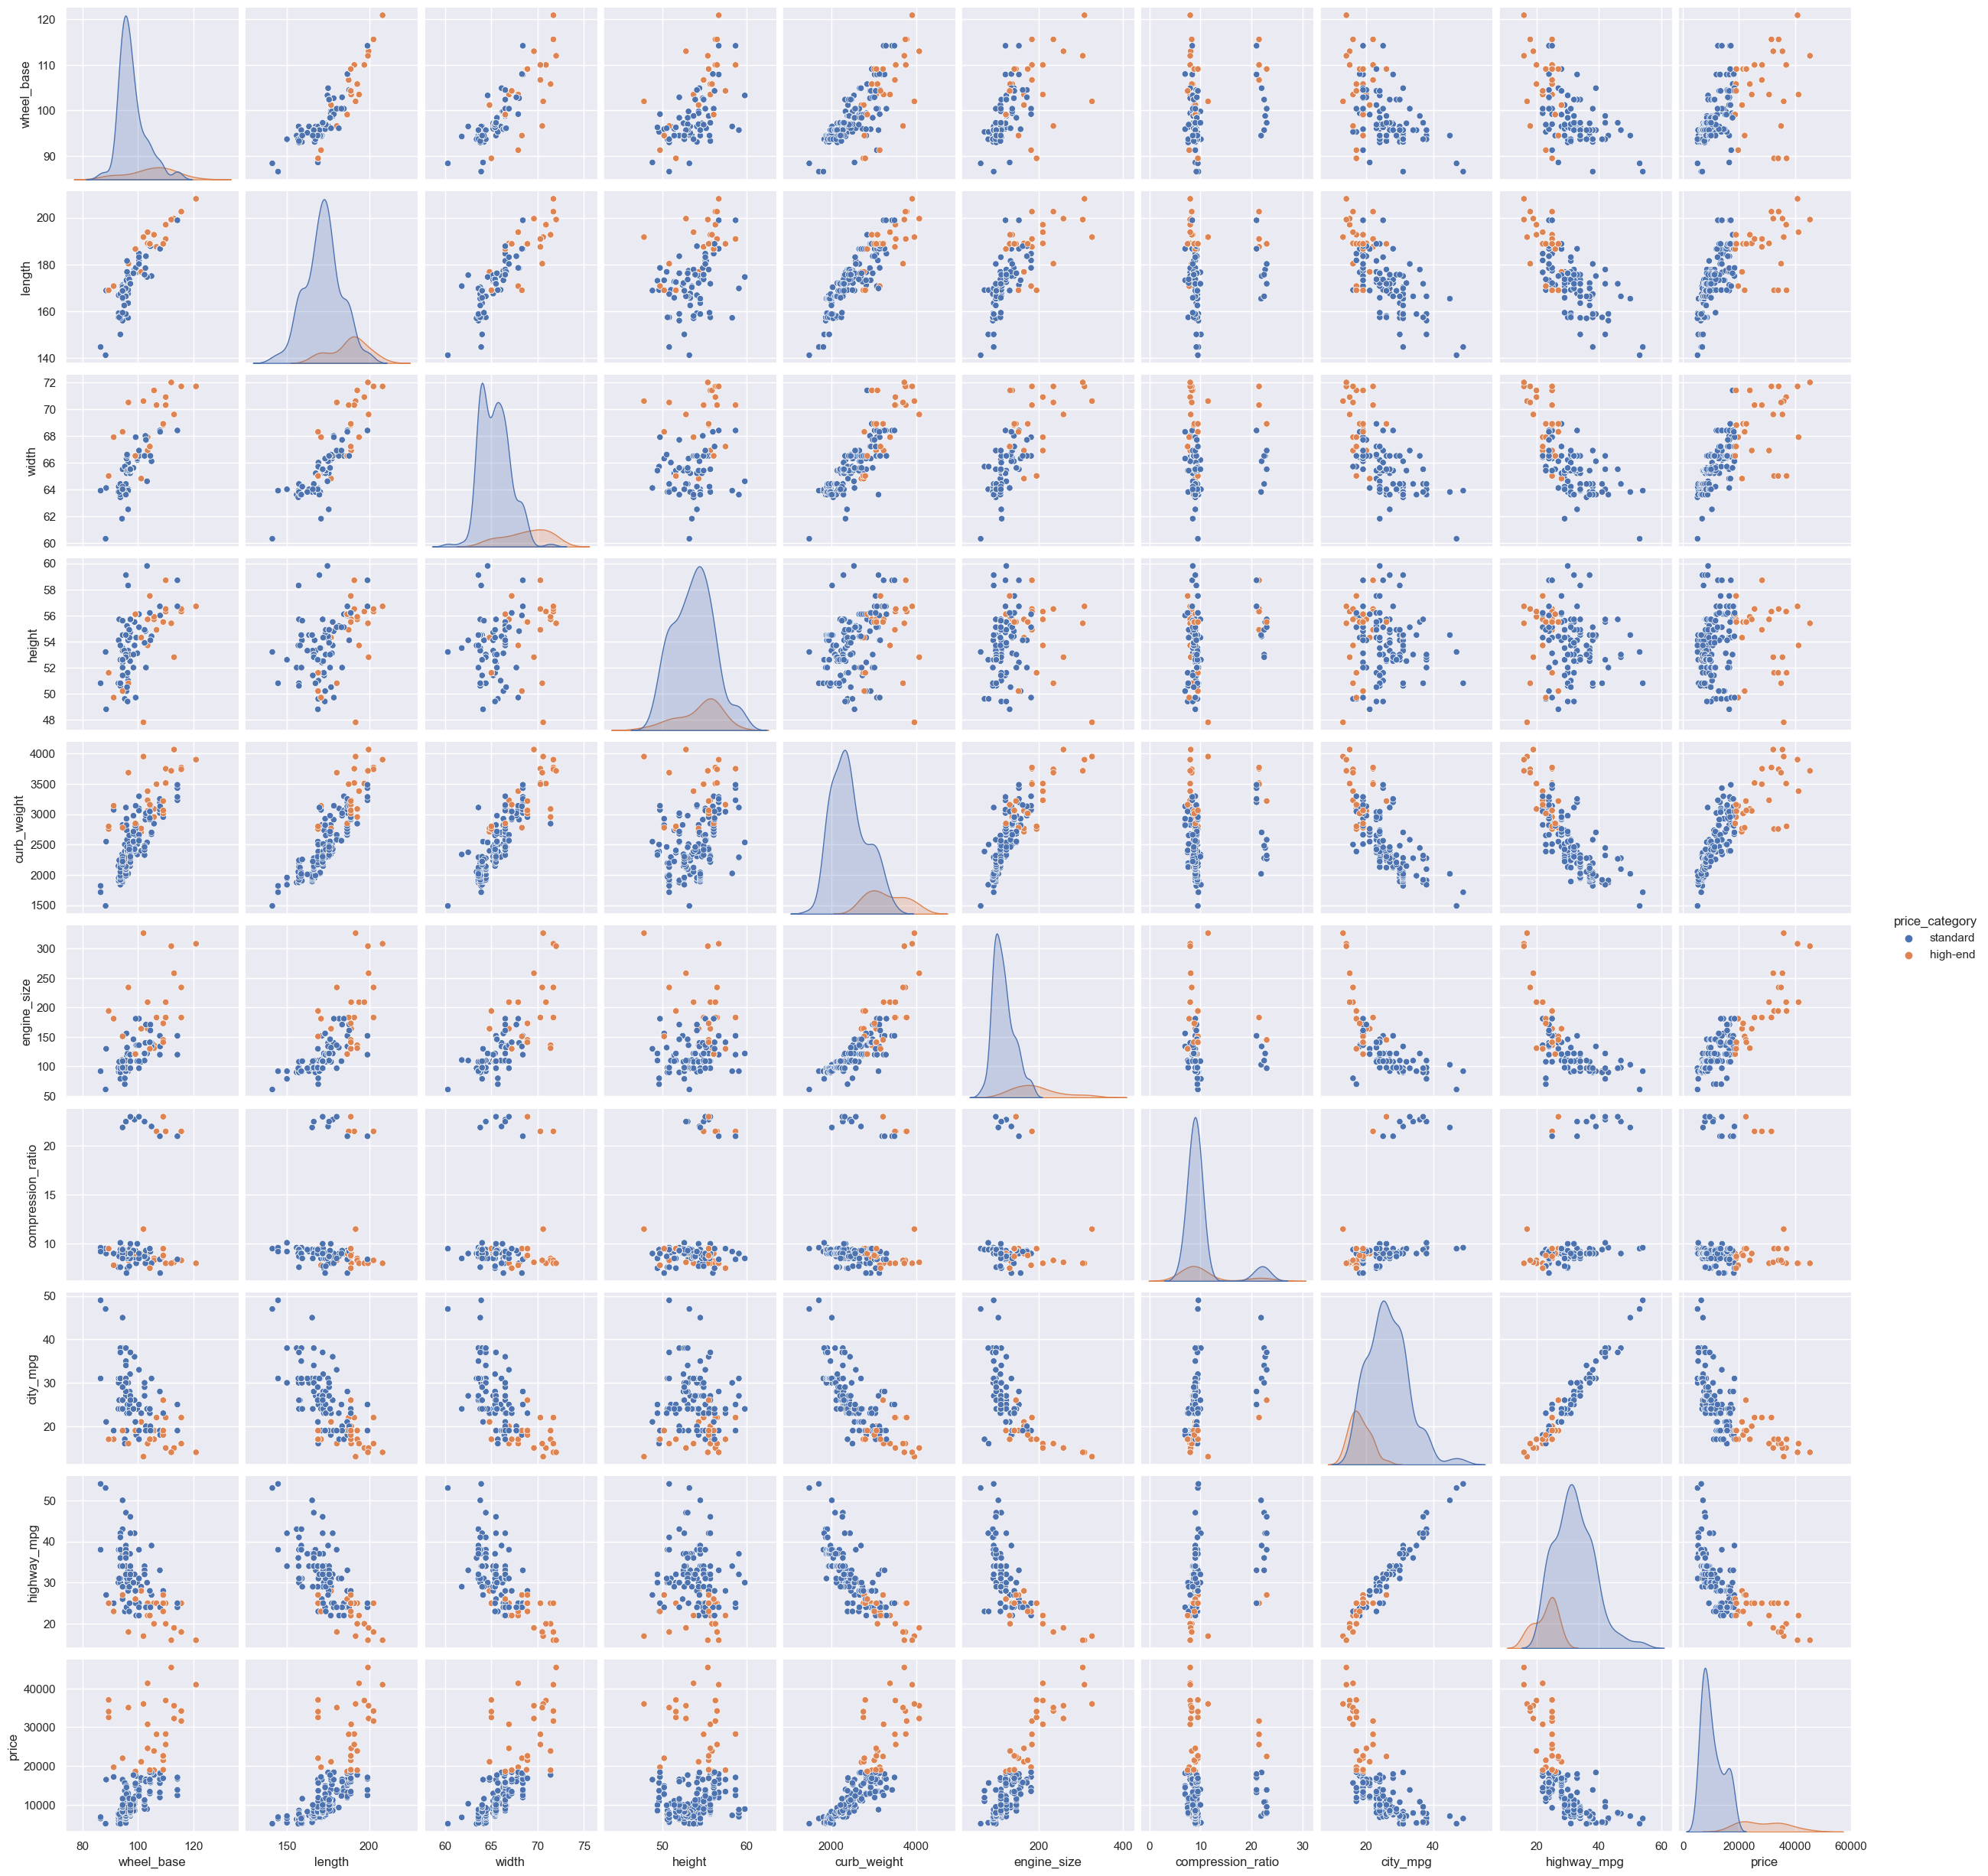

In [46]:
# visualizing distribution of price with continuous variables
col_numeric_pc = col_numeric.copy()
col_numeric_pc.append("price_category")
sns.pairplot(data[col_numeric_pc], hue="price_category")
plt.show()

Data preperation
Converting categorical variables into numeric
Applying label encoding since I will be using a tree based model

In [51]:
# converting categorical variables into numeric variables using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded = data.drop(columns=["price_category"])
df_encoded[col_categorical[:-1]] = df_encoded[col_categorical[:-1]].apply(lambda col: le.fit_transform(col))

df_encoded.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,5,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,16500
1,3,51,0,1,0,2,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,16500
2,4,27,1,1,0,1,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,13950
3,4,27,1,1,0,1,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,17450
4,4,51,1,1,0,2,3,1,0,99.8,...,136,5,13,24,8.5,4,16,19,25,15250


Creating dependent and independent variables

In [52]:
# independent variables
X = df_encoded.drop(columns="price")

# dependent variable
y = df_encoded["price"]

Splitting data into train test data

In [53]:
# splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model building
Decision tree regressor
Building base mode

In [54]:
# building a base model
from sklearn.tree import DecisionTreeRegressor
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
# scoring using test data
from sklearn.metrics import r2_score
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9130494002197099


Hyperparameter tuning

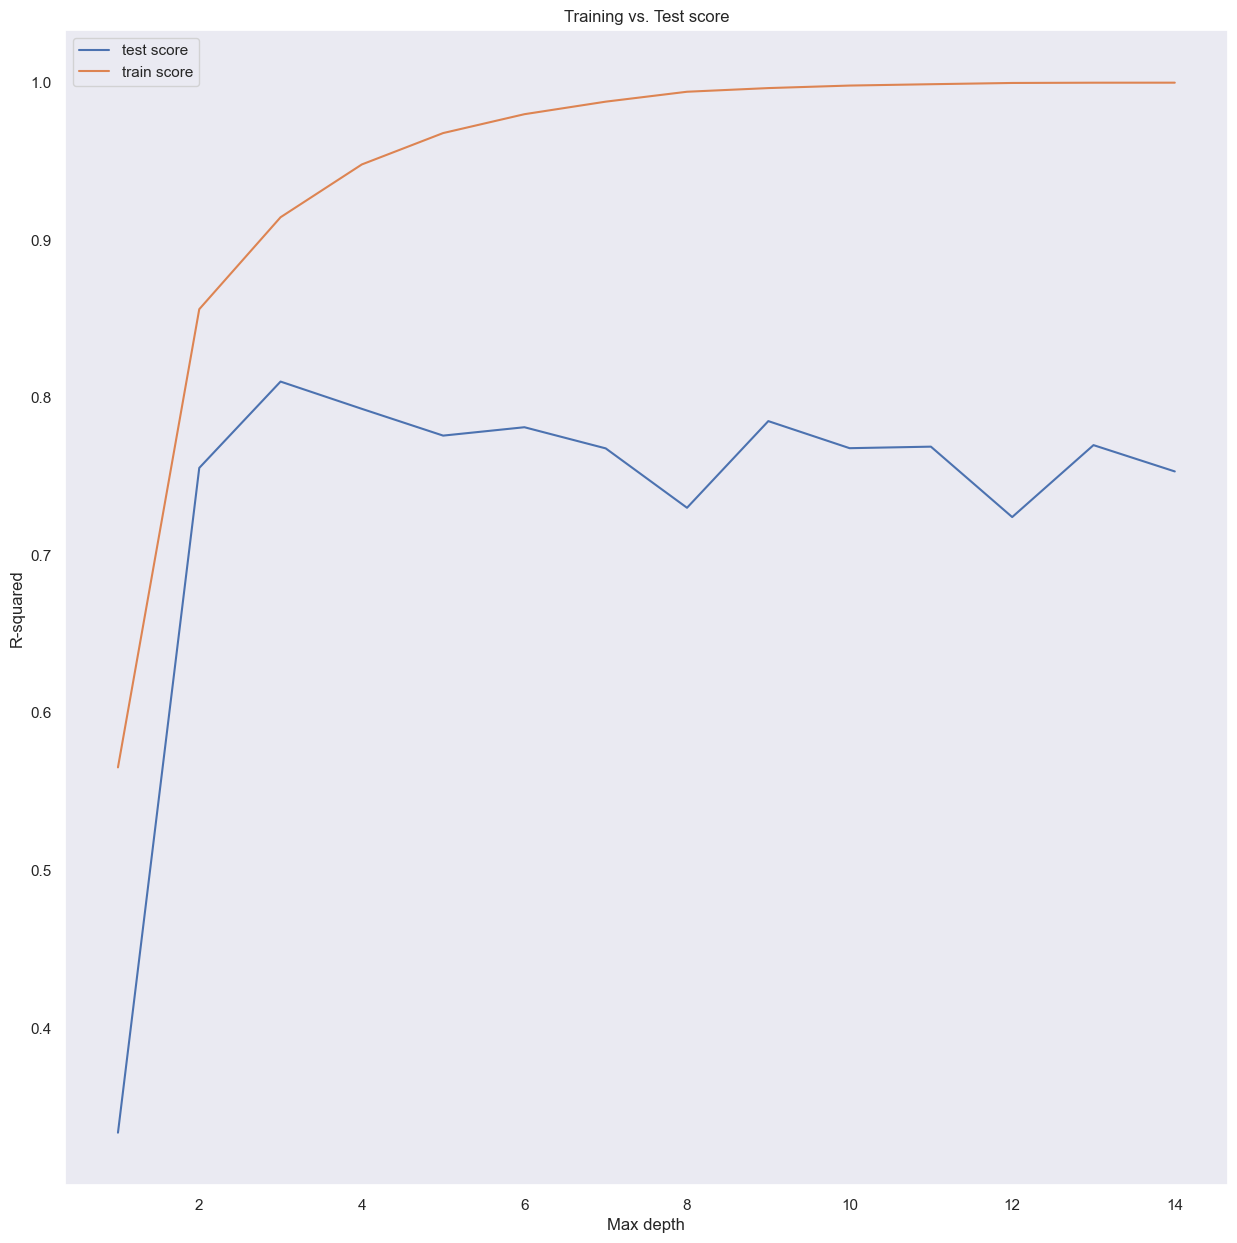

In [57]:
# hyperparameter tuning for best model
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":list(range(1,15))}

base_model = DecisionTreeRegressor()
cv_model = GridSearchCV(estimator=base_model, param_grid=parameters, scoring='r2', return_train_score=True, cv=5).fit(X_train,y_train)

pd.DataFrame(cv_model.cv_results_)#[["mean_test_score","mean_train_score"]]

# train and test scores
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_test_score"], label="test score")
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("R-squared")
plt.xlabel("Max depth")
plt.legend()
plt.grid()
plt.show()

Observations:

There is no improvement in training score after max depth 8, so we build our model with max depth 8

In [58]:
# building final model
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9326274627495114


conclusion
how exactly the prices vary with the
independent variables. They can accordingly manipulate the design of the cars, the
business strategy etc. to meet certain price levels. Further, the model will be a good
way for management to understand the pricing dynamics of a new market.


The challenges that we faced during automobiles price prediction using machine learning:

**Converting anonymous data to proper data:** converting the anonymous data to proper data , adding the proper columns name 

**Feature modeling:** When dealing with a large number of columns or features, finding meaningful correlations between them can be challenging. Correlation analysis helps identify which features are strongly related to the target variable (automobile in this case) and which are not. However, for a large number of columns, this process can become complex and time-consuming.

**Hyperparameter Tuning:** Hyperparameter tuning involves finding the best set of hyperparameters for a machine learning model to achieve optimal performance. This process often requires multiple iterations of training and evaluating the model with different hyperparameter configurations. It can be time-consuming because it involves a search in a high-dimensional space of hyperparameters, and each iteration requires training the model, which can be computationally expensive